<a href="https://colab.research.google.com/github/BenBlondeel-UCLL/Troy-ML/blob/master/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use elbow method to determine optimal k.
For k-Means Clustering on iris dataset only. iris dataset can be loaded from sklearn.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

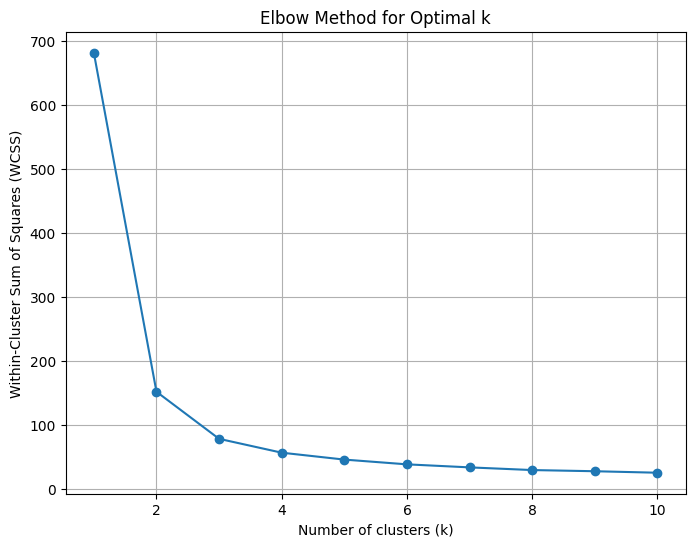

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Define a range of k values to test
k_range = range(1, 11)

# Initialize a list to store the WCSS for each k
wcss = []

# Compute WCSS for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

Get MNIST dataset as the instructions in 15.21. Use PCA dimensional reduction for logistic regression on MNIST to show how much PCA can help to speed up logistic regression


In [8]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


#Load the data set.
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use standardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression without PCA
start_time = time.time()
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
logisticRegr.fit(X_train_scaled, y_train)
y_pred = logisticRegr.predict(X_test_scaled)
accuracy_without_pca = accuracy_score(y_test, y_pred)
time_without_pca = time.time() - start_time

print(f"Accuracy without PCA: {accuracy_without_pca:.4f}")
print(f"Time without PCA: {time_without_pca:.4f} seconds")

# Apply PCA
pca = PCA(.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Logistic Regression with PCA
start_time = time.time()
logisticRegr_pca = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
logisticRegr_pca.fit(X_train_pca, y_train)
y_pred_pca = logisticRegr_pca.predict(X_test_pca)
accuracy_with_pca = accuracy_score(y_test, y_pred_pca)
time_with_pca = time.time() - start_time

print(f"Accuracy with PCA: {accuracy_with_pca:.4f}")
print(f"Time with PCA: {time_with_pca:.4f} seconds")

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Accuracy without PCA: 0.9164
Time without PCA: 285.6049 seconds
Accuracy with PCA: 0.9216
Time with PCA: 108.4884 seconds
